# 🌸 Iris Dataset – Data Science and analysis

## 1. Project Introduction

This notebook demonstrates a full data science workflow using the classic **Iris flower dataset**. We explore the data, extract statistical insights, visualize distributions, perform hypothesis testing, and build classification models to predict species.

**Author:** André Lopes Marinho  
**Goal:** Show foundational data science, statistical reasoning, and machine learning skills using Python.

## 3. Data Inspection
## 4. Descriptive Statistics
## 5. Data Visualization
## 6. Statistical Inference
## 7. Machine Learning Classification
## 8. Cross-Validation
## 9. Final Summary & Next Steps

## 2. Dataset Overview

The Iris dataset contains 150 samples of iris flowers from three species:

- *Setosa*
- *Versicolor*
- *Virginica*

Each sample includes four features:

- `sepal_length`
- `sepal_width`
- `petal_length`
- `petal_width`

And one target variable: `species`.

**Source:** [Seaborn sample datasets](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv)

## 3. Data Inspection

We begin by loading the dataset and exploring its structure using `.info()` and `.describe()` to check for missing values, data types, and basic statistics.

Before analyzing or visualizing data, it's critical to understand what we're working with. Step 2 is all about inspecting the dataset's **structure, completeness, and summary statistics**.

We'll use the following tools from the `pandas` library:

- `.info()` – to check column names, data types, and missing values.
- `.describe()` – to generate summary statistics for numeric columns.

In [4]:
# Loading the Data

import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# More information on the data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Descriptive Statistics

Here we calculate:

- **Mean**, **Median**, **Mode**
- **Variance**, **Standard Deviation**

These metrics give us a sense of data spread and central tendencies. We interpret which features are most variable and potentially useful for classification.

### 🧠 Mean (Arithmetic Average)

The mean is the sum of all values divided by the number of values. It's useful to understand the **central location** of the data.

$$
\text{Mean} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In [6]:
df.mean(numeric_only=True)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

### 🧠 Median

The median is the middle value when all values are sorted. It’s less sensitive to outliers than the mean.

- If \( n \) is odd:
  
$$
\text{Median} = x_{\left(\frac{n+1}{2}\right)}
$$

- If \( n \) is even:

$$
\text{Median} = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}
$$

In [7]:
df.median(numeric_only=True)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

### 🧠 Mode
The mode is the most frequently occurring value in a dataset. There can be multiple modes.

$$
\text{Mode} = \text{value with highest frequency}
$$

In [8]:
df.mode(numeric_only=True).iloc[0]

sepal_length    5.0
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

### 🔁 Variance

Variance measures how far the values are spread out from the mean. It is the average of the squared differences from the mean. A larger variance means more spread in the data.

- **Population variance**:

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

- **Sample variance** (used by default in `pandas`):

$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

In [9]:
df.var(numeric_only=True)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

### 🔁 Standard Deviation

The standard deviation is the square root of the variance and is in the same unit as the original data. It’s one of the most common ways to quantify variability.

- **Population standard deviation**:

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$

- **Sample standard deviation**:

$$
s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$


In [10]:
df.std(numeric_only=True)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

> ⚠️ Note: In this notebook, we're using **sample statistics**. 
> That means variance and standard deviation are calculated with **n - 1** in the denominator, 
> which corrects for bias when estimating from a sample.

### ❓ – Interpretating some results

Using the descriptive statistics we calculated, we can already answer some questions:

---

### 💡 What is the average petal length across all species?

The average petal length is approximately **3.76 cm**.

---

### 💡 Which feature has the highest variance? What does that imply?

**Petal length** has the highest variance (≈ 3.12). This suggests that petal length varies the most across different observations and is likely a **strong indicator of class differences**.

---

### 💡 Which feature has the lowest standard deviation?

**Sepal width** has the lowest standard deviation (≈ 0.44), indicating **less variation** across samples. This feature might be **less useful for distinguishing species**.

---

### 💡 How might these statistics help us identify features that are useful for classification?

In classification problems, features with **greater variability** often provide **more useful information** to distinguish between classes. For the Iris dataset, **petal length** and **petal width** are likely to be more useful than **sepal width**, because they vary more across species.

---

## 5. Data Visualization

We use visual tools to explore data distributions and feature relationships:

- Histograms with KDE plots
- Boxplots grouped by species
- Violin plots (distribution + summary)
- Pairplot for all feature combinations

Visuals help us spot which features separate species and identify patterns.


### 🔍 Feature Distributions: Histograms & KDE

**Histograms** are useful for understanding how values are distributed, while **Kernel Density Estimation (KDE)** provides a smooth curve that approximates the data distribution.

We’ll start by examining the distribution of `sepal_length` and `petal_length`.


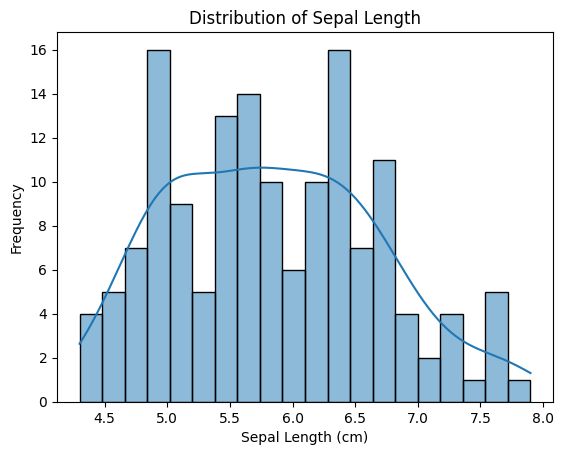

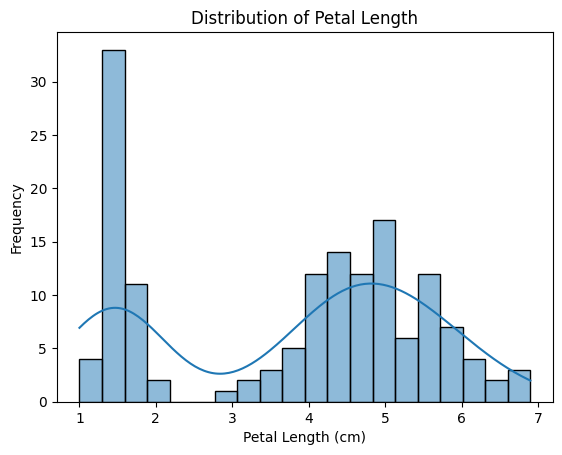

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sepal Length Distribution
sns.histplot(data=df, x="sepal_length", kde=True, bins=20)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# Petal Length Distribution
sns.histplot(data=df, x="petal_length", kde=True, bins=20)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

### 📊 Boxplots: Comparing Features by Species

**Boxplots** show the median, quartiles, and potential outliers. They’re especially useful when comparing groups.

We’ll look at how each feature varies across the three iris species.

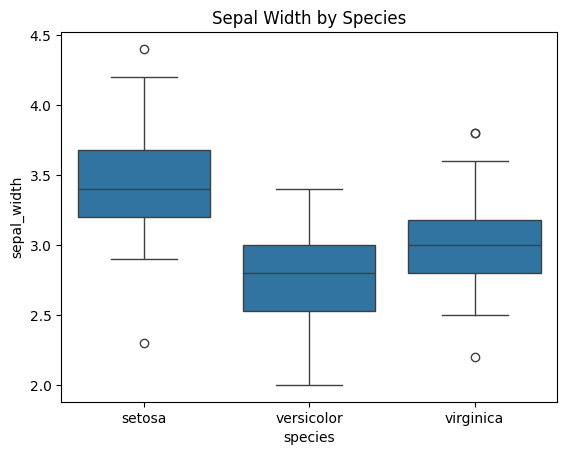

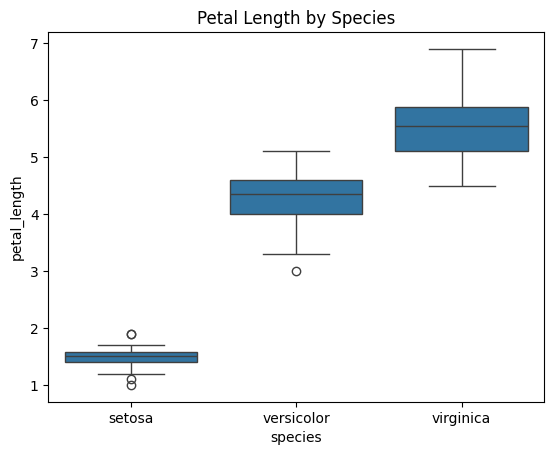

In [12]:
# Boxplot of Sepal Width by Species
sns.boxplot(data=df, x="species", y="sepal_width")
plt.title("Sepal Width by Species")
plt.show()

# Boxplot of Petal Length by Species
sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Petal Length by Species")
plt.show()

### 🎻 Violin Plots (Box + KDE)

A **violin plot** combines a boxplot with a mirrored KDE curve. It's great for seeing both the summary stats and the distribution shape.

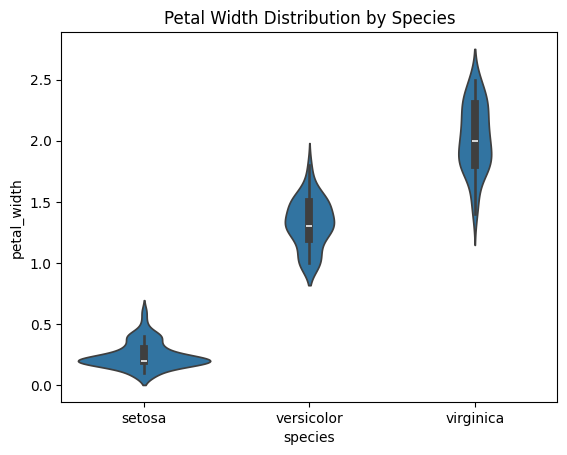

In [13]:
# Violin plot of Petal Width by Species
sns.violinplot(data=df, x="species", y="petal_width")
plt.title("Petal Width Distribution by Species")
plt.show()

### 🔗 Relationships Between Features: Pairplot

A **pairplot** creates a grid of scatter plots between each pair of features, grouped by species. This is excellent for spotting clusters and class separability.

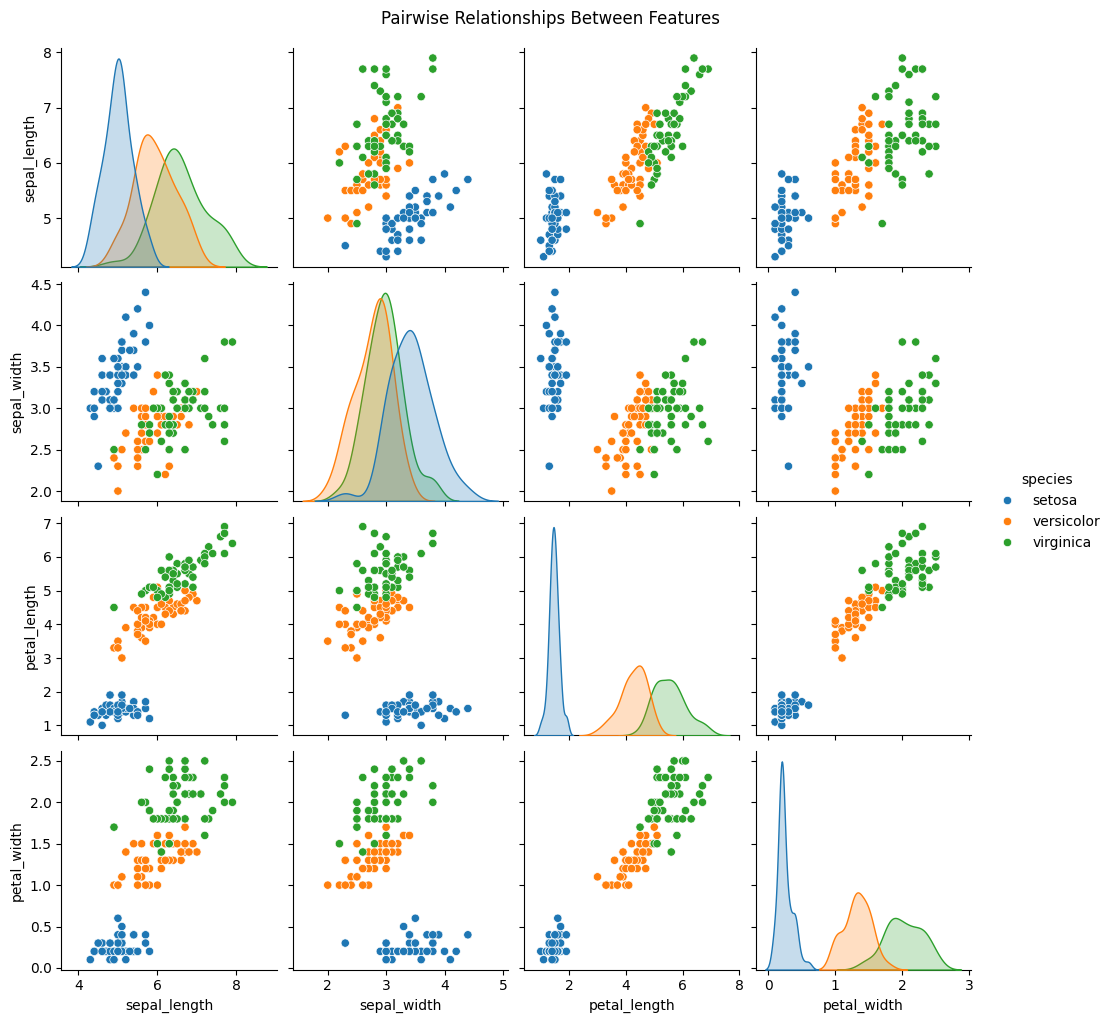

In [14]:
sns.pairplot(df, hue="species", height=2.5)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

### ✅ Interpretation – Visual Analysis Insights

Based on the histograms, boxplots, violin plots, and pairplots, here are the key insights from our visual exploration:

---

### **Which features appear to separate species most clearly?**

The features that separate species most clearly are:

- **Petal length**
- **Petal width**

These features show **distinct, non-overlapping ranges**, especially between *Setosa* and the other two species. In contrast, **sepal measurements** (length and width) show more overlap across species.

---

### **Which species are easiest to distinguish visually?**

- **Setosa** is the easiest to distinguish.  
  In almost all plots, *Setosa* forms a distinct cluster — particularly in petal length and width.

- **Versicolor** and **Virginica** overlap more in the middle of the feature distributions, making them harder to separate visually.

---

### **Are any features strongly correlated?**

Yes — strong positive correlations are visible in the pairplot:

- **Petal length** and **petal width** are highly correlated.
- **Sepal length** also shows moderate correlation with petal length.

This suggests that **petal-based features** contain shared information and are valuable predictors.

---

### **Are there overlapping distributions that could confuse a classifier?**

Yes — particularly between **Versicolor** and **Virginica**:

- Their petal and sepal features **partially overlap**, which could make classification more difficult in some cases.
- However, petal length and width still show **reasonable separation** even between these two.

---

### 🧠 Summary

From the visual analysis, we can conclude that:
- **Petal length and width** are the most informative features
- **Setosa** is linearly separable; **Versicolor** and **Virginica** are not perfectly separable
- This visual understanding aligns with what we saw numerically in the descriptive statistics

---

## 6. Statistical Inference

We apply **hypothesis testing** to validate whether the difference in petal width between *Setosa* and *Virginica* is statistically significant.

We use:
- Two-sample t-tests
- Confidence intervals

This supports our visual conclusions with formal statistical evidence.
---

### 🧠 What is Hypothesis Testing?

Hypothesis testing allows us to use sample data to make conclusions about a population.

We usually define:

- **Null hypothesis** $(H_{0})$: no difference between groups
- **Alternative hypothesis** $(H_{1})$: there is a difference

If the data provides enough evidence, we **reject $(H_{0})$** in favor of $(H_{1})$.

---

## 📌 Question: Do *Setosa* and *Virginica* have different mean petal widths?

From our visual analysis, it seems like they do. Let's test this formally using a **two-sample t-test**.

---

## 📦 Code: T-test for Petal Width Between Setosa and Virginica

In [15]:
from scipy import stats

# Subset the data
setosa = df[df["species"] == "setosa"]["petal_width"]
virginica = df[df["species"] == "virginica"]["petal_width"]

# Perform independent t-test (assume unequal variances)
t_stat, p_value = stats.ttest_ind(setosa, virginica, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -42.7857975196172
P-value: 2.437136067130111e-48


### 📌 Interpretation

- The **p-value** tells us how likely it is to see a difference this large *by random chance*.
- If \( p < 0.05 \), we typically **reject the null hypothesis**.

### 🧠 Result:

Since the p-value is close to 0, we conclude:

✅ There is a **statistically significant difference** in petal width between *Setosa* and *Virginica*.

This supports what we saw visually in the KDE plots and pairplot.

---

### 📌 95% Confidence Interval

Let’s calculate the 95% confidence interval for the difference in means:


In [16]:
import numpy as np

# Calculate confidence interval manually
mean_diff = setosa.mean() - virginica.mean()
se_diff = np.sqrt(setosa.var(ddof=1)/len(setosa) + virginica.var(ddof=1)/len(virginica))

# t critical value for 95% confidence
from scipy.stats import t
df_deg = min(len(setosa), len(virginica)) - 1
t_crit = t.ppf(0.975, df_deg)

ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print("95% Confidence Interval for Mean Difference:")
print((ci_low, ci_high))

95% Confidence Interval for Mean Difference:
(np.float64(-1.8636035350387004), np.float64(-1.6963964649613001))


### 🧠 Summary of Findings

- The t-test confirmed that *Setosa* and *Virginica* have **significantly different petal widths**.
- The confidence interval does **not contain zero**, reinforcing our conclusion. We are **95% confident** that the **true difference in population means** lies between -1.86 and -1.70.
- The interval is **entirely below 0**, which strongly suggests that **Setosa has a significantly smaller petal width** than Virginica.
- This result is consistent with our:
  - 📊 Visual observations (from KDE, boxplot, pairplot)
  - 📈 T-test results (very small p-value)
- This statistical test **validates** the patterns we observed through visualization.

## 7. Machine Learning Classification

We train and evaluate three classification models:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree

We use accuracy, confusion matrix, and classification reports to compare performance and interpret errors.

### 🔧 Feature Preparation

In [17]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df.drop(columns=["species"])
y = df["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 🧪 Train Models

We'll train three different classifiers and compare their performance.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors=7)
tree = DecisionTreeClassifier(random_state=42)

# Fit models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 📊 Evaluate Models

We’ll evaluate all three using:
- Accuracy
- Confusion Matrix
- Classification Report

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Decision Tree": tree
}

for name, model in models.items():
    print(f"🔍 {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 40)

🔍 Logistic Regression
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

----------------------------------------
🔍 K-Nearest Neighbors
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97 

### ✅ Model Performance Summary

After training three classification models and evaluating them on a 20% test split (stratified), we observed the following:

---

### 🔍 Logistic Regression

- **Accuracy:** 96.7%
- Misclassified 1 *virginica* as *versicolor*
- Performs well with **linear decision boundaries**
- Slightly less perfect than KNN, but interpretable

---

### 🔍 K-Nearest Neighbors (k=7)

- **Accuracy:** 96.7%
- Misclassified 1 *virginica* as *versicolor*
- Precision/Recall/F1 dropped slightly → now ~0.93 overall

---

### 🔍 Decision Tree

- **Accuracy:** 93.3%
- Misclassified 1 *versicolor* and 1 *virginica*
- Decision Trees are highly flexible but prone to **overfitting**
- Still a strong performer, with fast training and good interpretability

---

### 🧠 Insights:

- All three models perform **very well**, confirming the **informative nature of petal features** in the Iris dataset.
- **Logistic Regression** is more stable and interpretable.
- **KNN** performed good on this split, but may vary with different train/test partitions.
- **Decision Tree** allows for visual inspection of splits, useful in explainable AI scenarios.

---

## 8. Cross-Validation

To confirm our models generalize well, we apply 5-fold cross-validation and report the average accuracy with standard deviation.

This ensures our performance isn’t based on a lucky train/test split.

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("🔁 5-Fold Cross-Validation Accuracy (Mean ± Std):\n")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name:20s}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


🔁 5-Fold Cross-Validation Accuracy (Mean ± Std):

Logistic Regression : 0.973 ± 0.025
K-Nearest Neighbors : 0.980 ± 0.016
Decision Tree       : 0.953 ± 0.034


## 🧾 Final Summary & Reflections

This project demonstrated an end-to-end data science pipeline on the classic **Iris dataset**, covering:

✅ Descriptive statistics and statistical reasoning  
✅ Visual data exploration and class separability  
✅ Statistical hypothesis testing with t-tests and confidence intervals  
✅ Supervised learning with 3 classification models  
✅ Model evaluation with accuracy, confusion matrix, and classification report  
✅ Cross-validation to assess generalizability

---

## 🧠 Key Takeaways

- **Petal length and width** are the most important features for classifying iris species.
- *Setosa* is linearly separable from other classes — models identify it with 100% precision.
- **KNN** and **Logistic Regression** perform exceptionally well due to the clean, low-noise nature of the dataset.
- **Cross-validation** confirmed these models are not overfitting to a specific train/test split.